1. Load and Prepare the Data

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X, y = data.data, data.target  # Binary: 0 = malignant, 1 = benign

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for Perceptron)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
?Perceptron

Init signature:
Perceptron(
    *,
    penalty=None,
    alpha=0.0001,
    l1_ratio=0.15,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    shuffle=True,
    verbose=0,
    eta0=1.0,
    n_jobs=None,
    random_state=0,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    class_weight=None,
    warm_start=False,
)
Docstring:     
Linear perceptron classifier.

Read more in the :ref:`User Guide <perceptron>`.

Parameters
----------

penalty : {'l2','l1','elasticnet'}, default=None
    The penalty (aka regularization term) to be used.

alpha : float, default=0.0001
    Constant that multiplies the regularization term if regularization is
    used.

l1_ratio : float, default=0.15
    The Elastic Net mixing parameter, with `0 <= l1_ratio <= 1`.
    `l1_ratio=0` corresponds to L2 penalty, `l1_ratio=1` to L1.
    Only used if `penalty='elasticnet'`.

    .. versionadded:: 0.24

fit_intercept : bool, default=True
    Whether the intercept should be es

2. Train Perceptron

Accuracy: 0.9736842105263158
Confusion Matrix:
 [[42  1]
 [ 2 69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



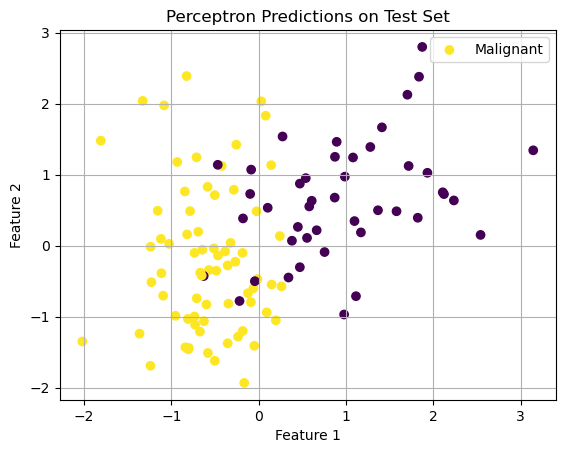

In [2]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib import pyplot as plt

# Train the Perceptron model
clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict
y_pred = clf.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the dataset
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c= y_pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Predictions on Test Set')
plt.legend(['Malignant', 'Benign'], loc='upper right')
plt.grid()  
#legend

plt.show()

This scatter plot shows how the Perceptron model performed on the test set. Each dot represents a data point, where the two axes — Feature 1 and Feature 2 — are the selected features used for classification. The yellow points represent data that the model predicted as malignant, while the purple points represent the other class, likely benign. We can see that the Perceptron learned to separate the two groups based on their position in feature space. While some overlap and misclassifications exist near the center, the model does a fairly good job at dividing the two classes, especially considering that the Perceptron is a linear classifier. This visual helps us understand how well the algorithm is learning to distinguish between categories based on patterns in the input features.



3. Compare with Logistic Regression

Logistic Regression Accuracy: 0.9736842105263158


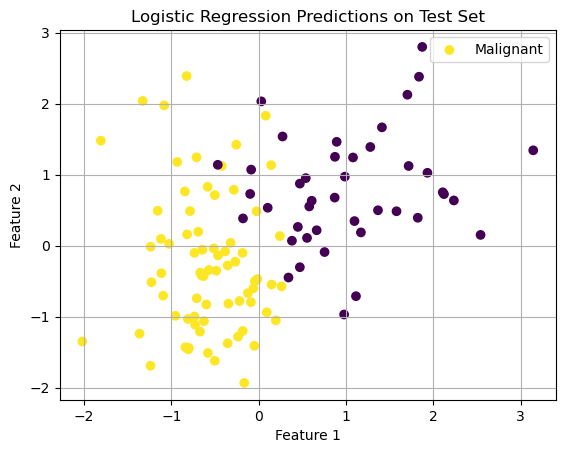

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
logreg_pred = logreg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))

#plot the dataset
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=logreg_pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Predictions on Test Set')
plt.legend(['Malignant', 'Benign'], loc='upper right')
plt.grid()
plt.show()

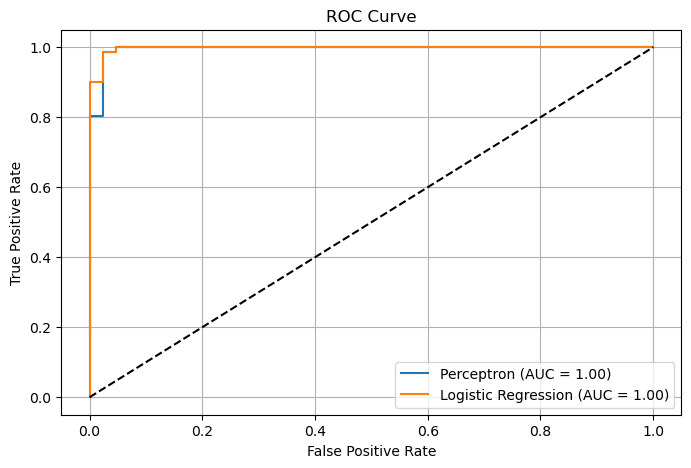

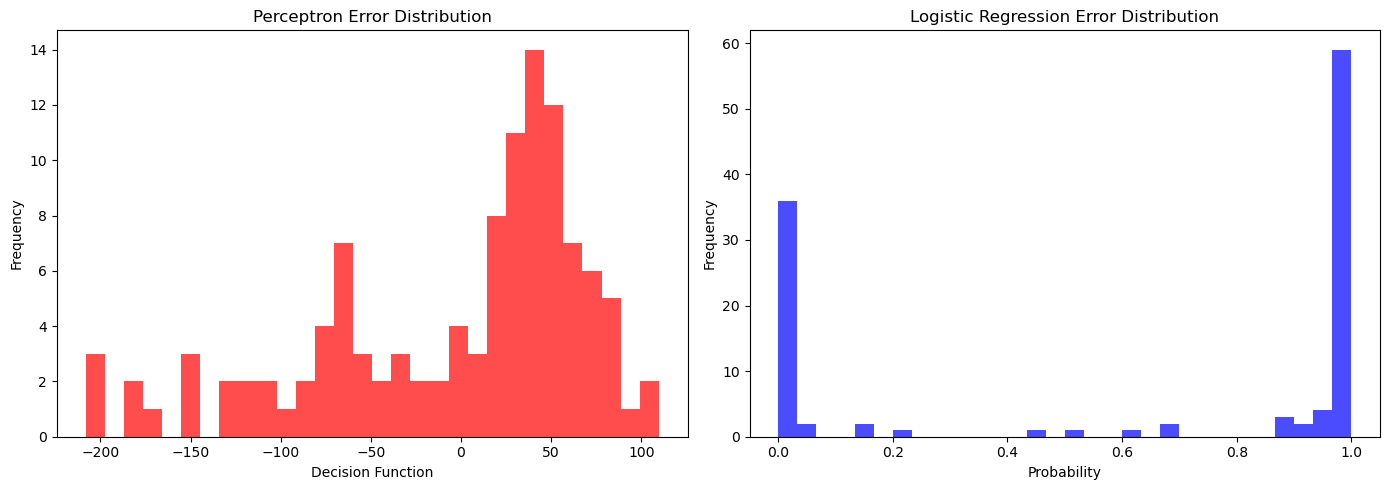

In [ ]:
from sklearn.metrics import roc_curve, auc


# AUROC (ROC Curve) for perceptron and logistic regression
plt.figure(figsize=(8, 5))
for model, name in zip([clf, logreg], ['Perceptron', 'Logistic Regression']):
    y_score = model.decision_function(X_test_scaled) if name == 'Perceptron' else model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()



# Error Distribution 
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Perceptron
axs[0].hist(clf.decision_function(X_test_scaled), bins=30, color='red', alpha=0.7)
axs[0].set_title('Perceptron Error Distribution')
axs[0].set_xlabel('Decision Function')
axs[0].set_ylabel('Frequency')

# Logistic Regression
axs[1].hist(logreg.predict_proba(X_test_scaled)[:, 1], bins=30, color='blue', alpha=0.7)
axs[1].set_title('Logistic Regression Error Distribution')
axs[1].set_xlabel('Probability')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


